# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [ ]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов
import numpy as np


## Реализация базовой модели

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0 and self.deals_results[i]['seller_id'] != None: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            elif self.deals_results[i]['seller_id'] != None:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 24502.18it/s]


## Визуализация модели

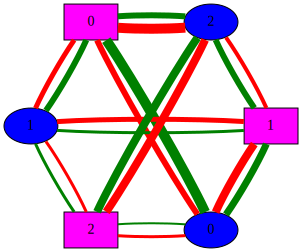

In [ ]:
model.plot_graph(100, 200)

## Результаты моделирования

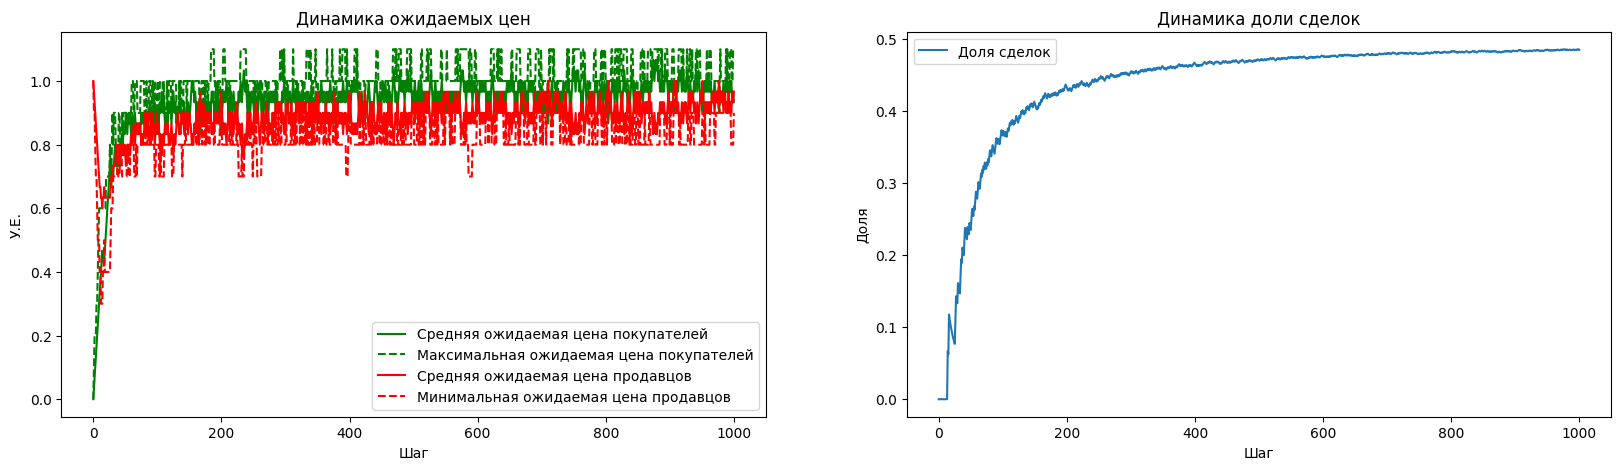

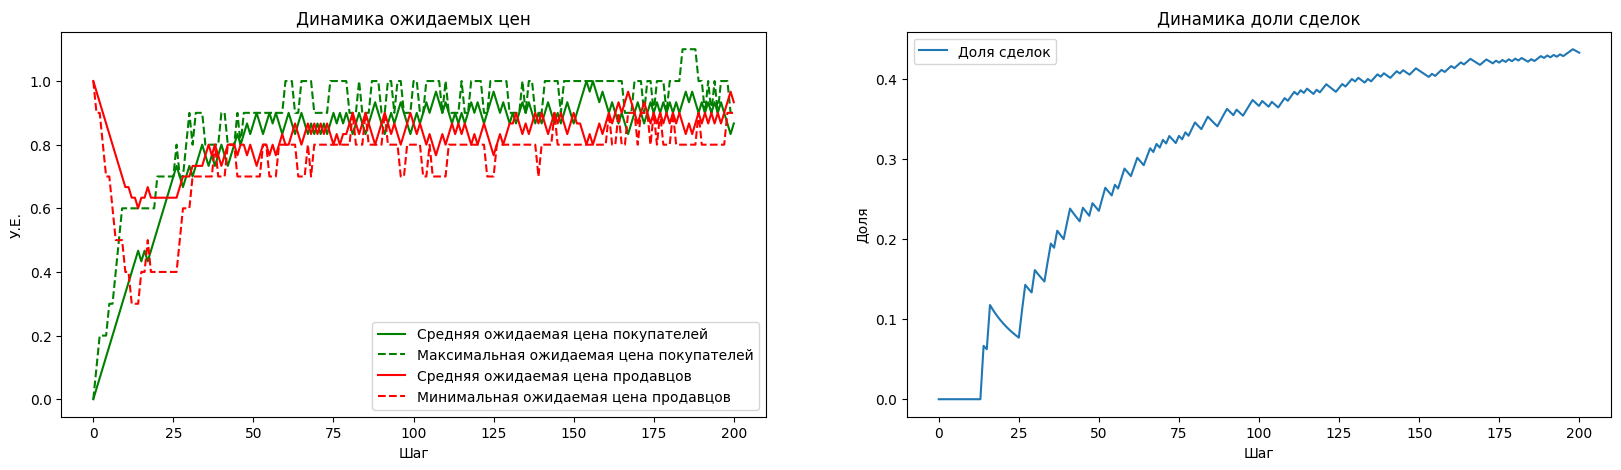

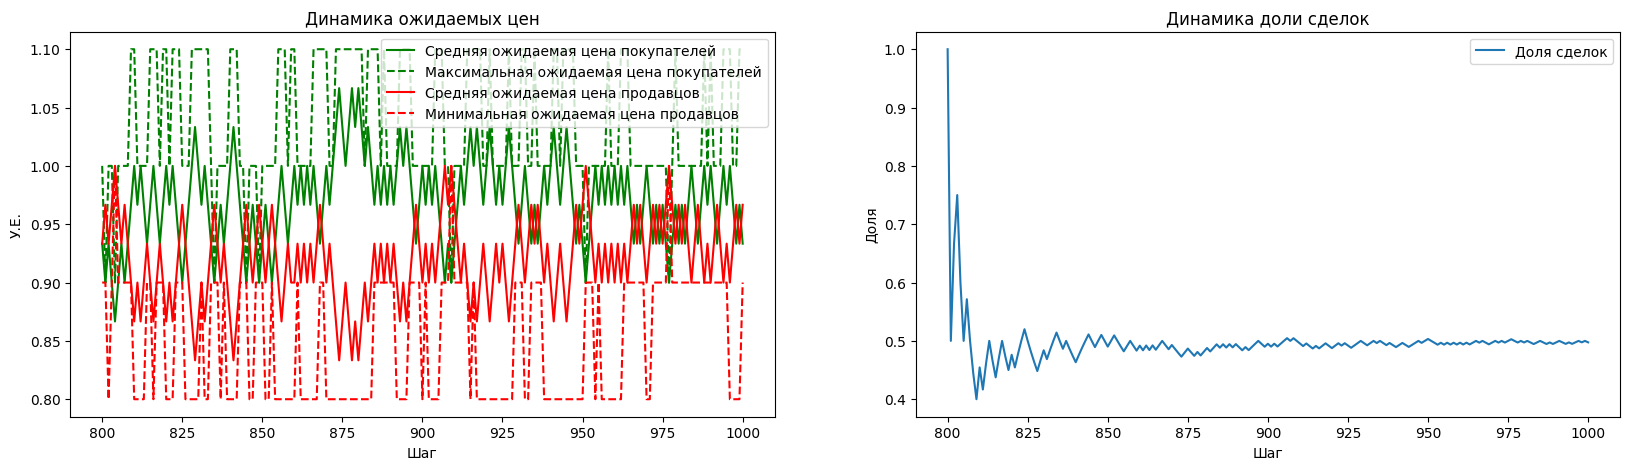

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

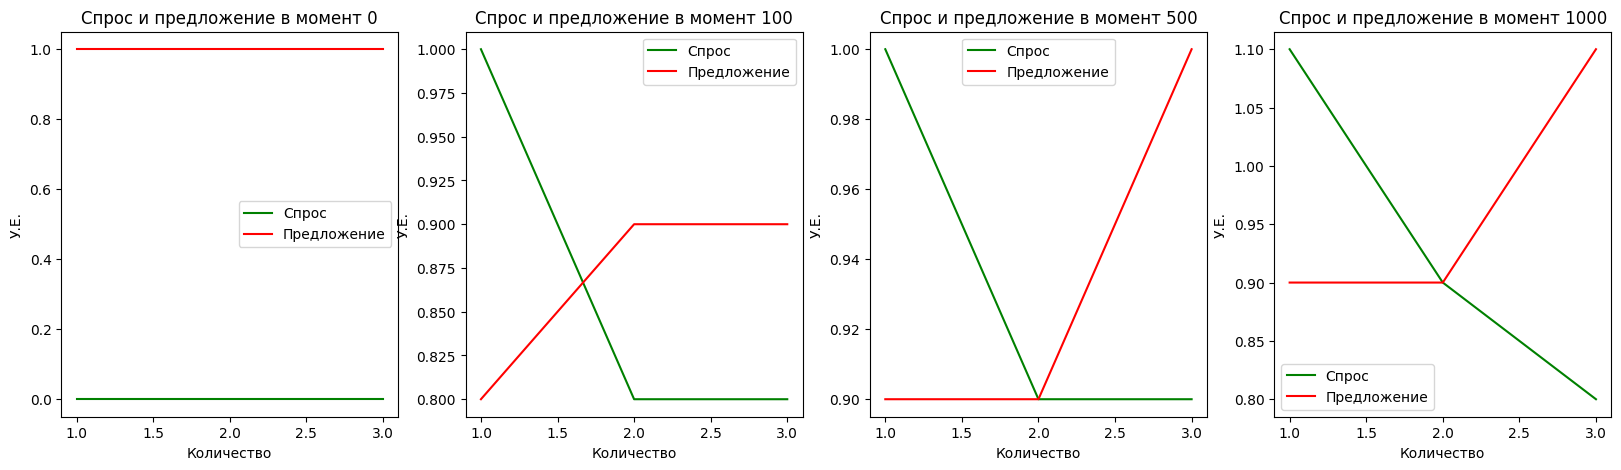

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Модификации

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Больше случайности

100%|██████████| 1001/1001 [00:00<00:00, 54485.62it/s]


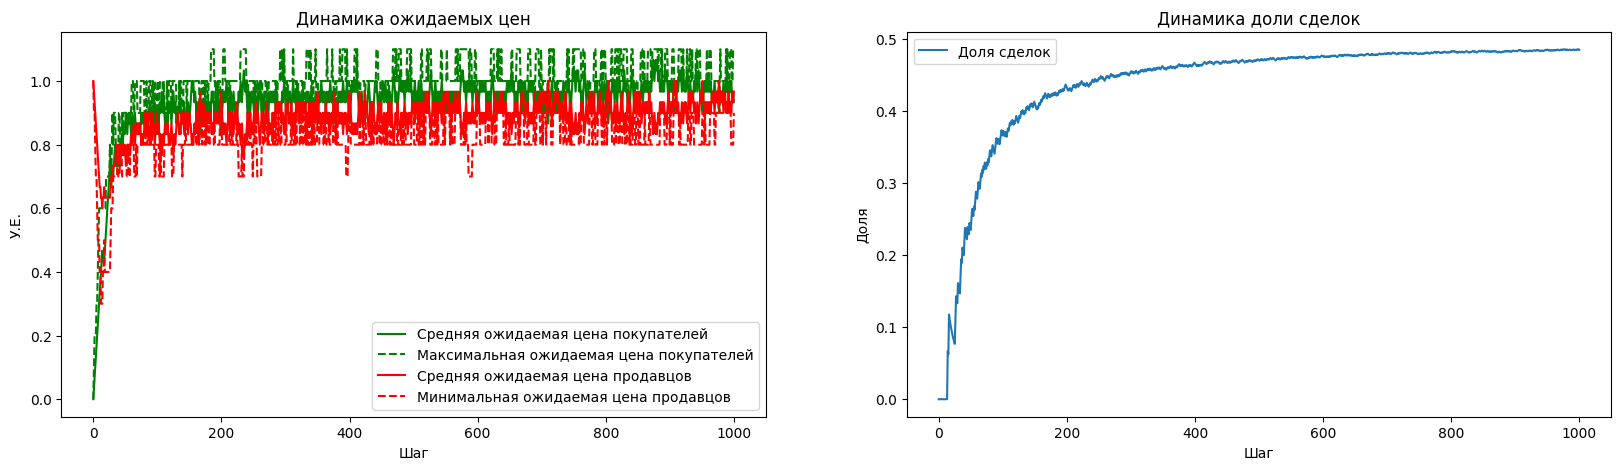

In [ ]:
# Построим визуализации еще раз, чтобы было удобнее оценивать результаты работы модели.
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)
model.plot_dynamics(0, 1000)

Видно, что ожидаемые цены и покупателей, и производителей попадают в интервал примерно от 0.8 до 1. При этом размер интервала, в котором колеблются ожидаемые цены покупателей, примерно равен consumer_delta, а для продавцов соответственно seller_delta.

100%|██████████| 3001/3001 [00:00<00:00, 47041.94it/s]


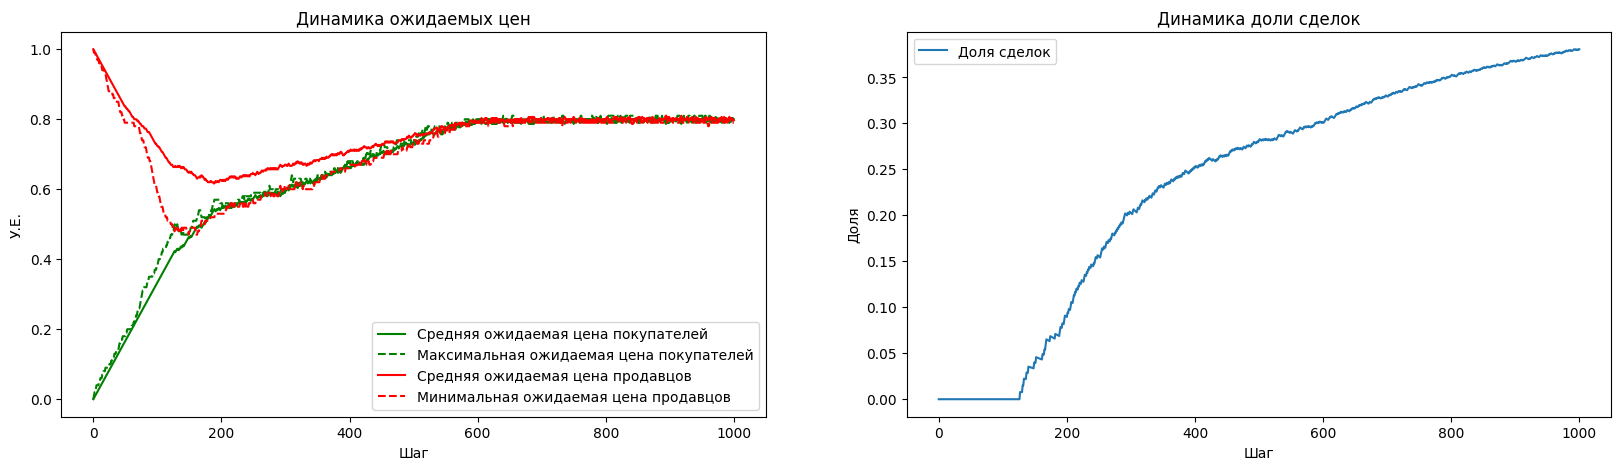

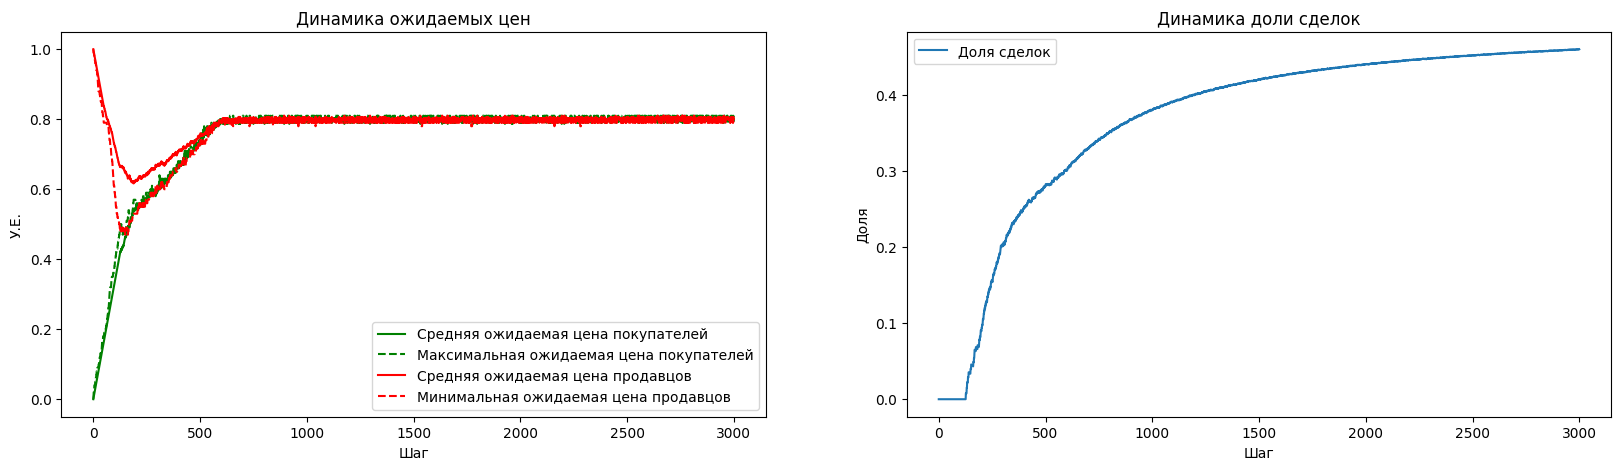

In [ ]:
# Попытаемся понять, как изменение delta влияет на работу модели - поставим очень маленькие значения как для продавцов, так и для покупателей

model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.01,
              seller_min=0,
              seller_max=1,
              seller_delta=0.01)
model.run(3000)
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 3000)

Как видим, слишком маленькое значение изменения ожидаемых цен не делает ситуацию на рынке сильно лучше. Доля заключаемых сделок так же приближается к примерно 1/2, только для этого требуется гораздо больше времени - первые несколько сотен итераций продавцы и покупатели не заключают практически никаких сделок

100%|██████████| 501/501 [00:00<00:00, 44372.45it/s]


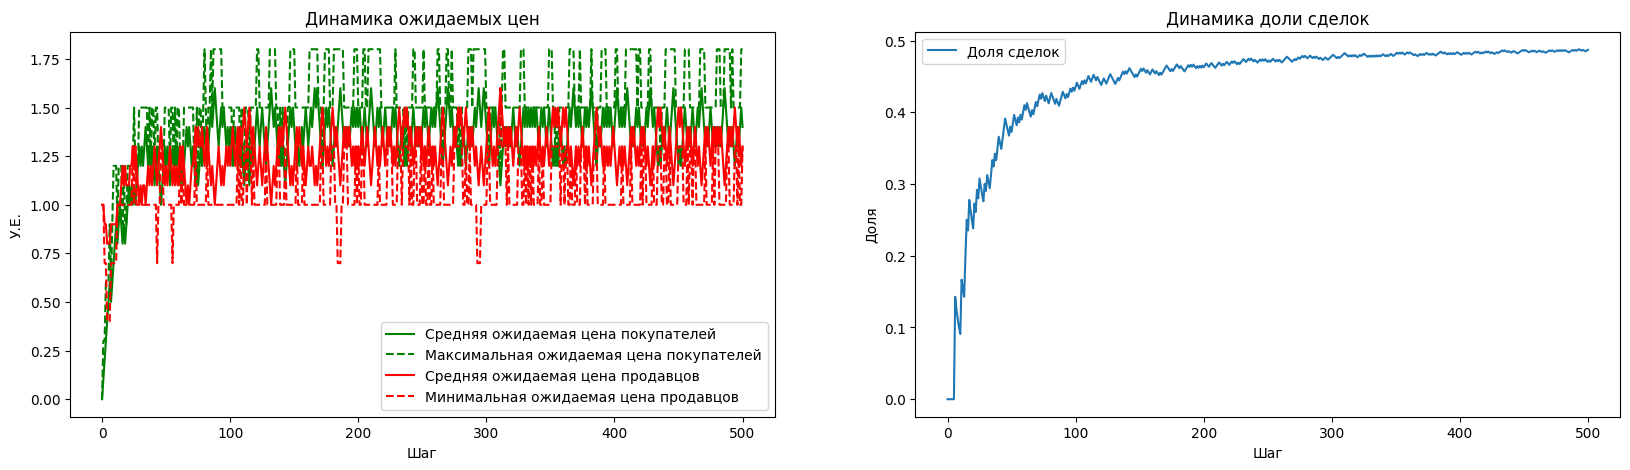

In [ ]:
# Теперь, наоборот, посмотрим как изменяется работа модели при увеличении delta:

model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.3,
              seller_min=0,
              seller_max=1,
              seller_delta=0.3)
model.run(500)
model.plot_dynamics(0, 500)


Видно, что доля сделок очень быстре приблизилась к 1/2. Вместе с тем колебания ожидаемых цен сильно увеличились и теперь максимальные цены покупателей и производителей отличаются где-то на 0.75

100%|██████████| 10001/10001 [00:00<00:00, 30879.59it/s]


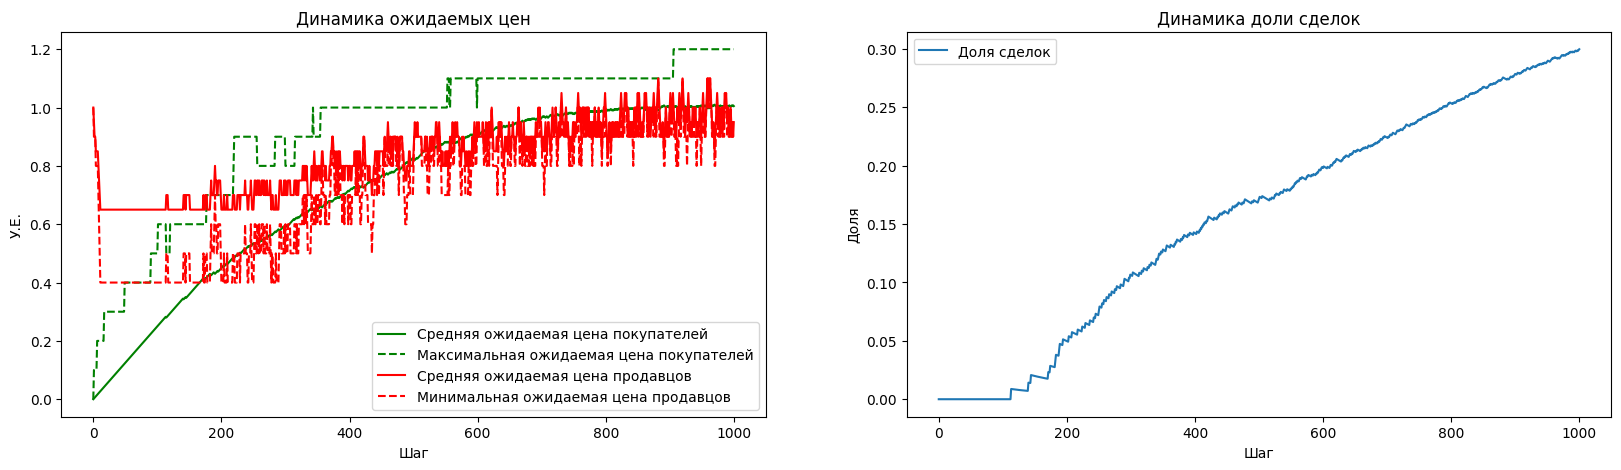

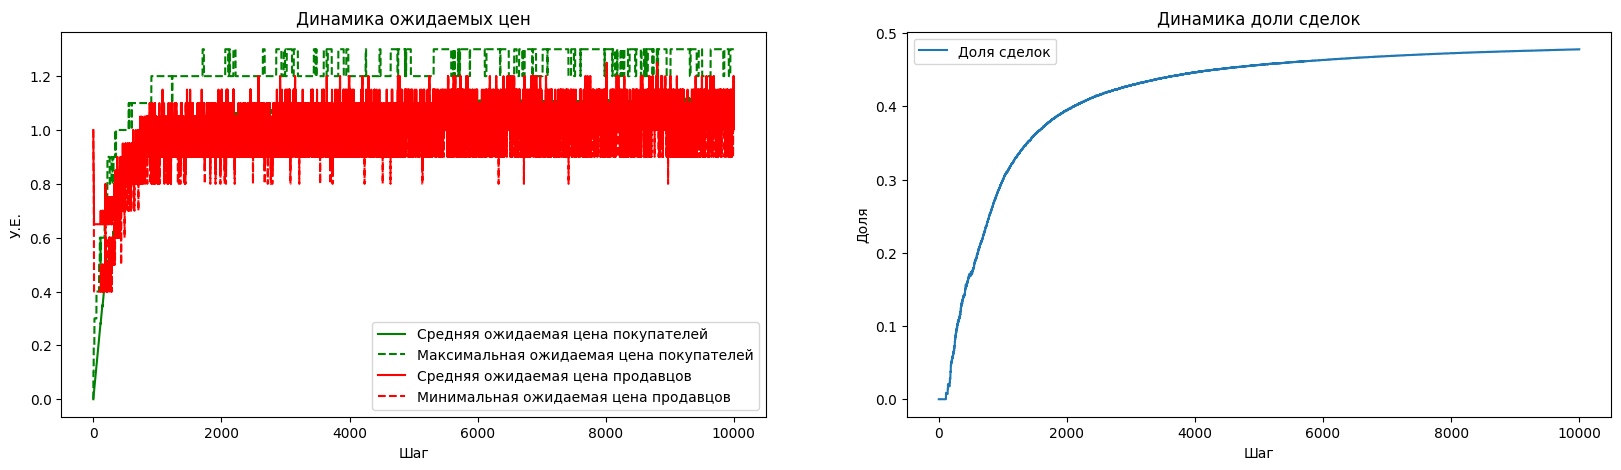

In [ ]:
# Теперь меняем количество продавцов и покупателей

model = Model(num_of_consumers=40,
              num_of_sellers=2,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(10000)
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 10000)

100%|██████████| 10001/10001 [00:00<00:00, 108577.92it/s]


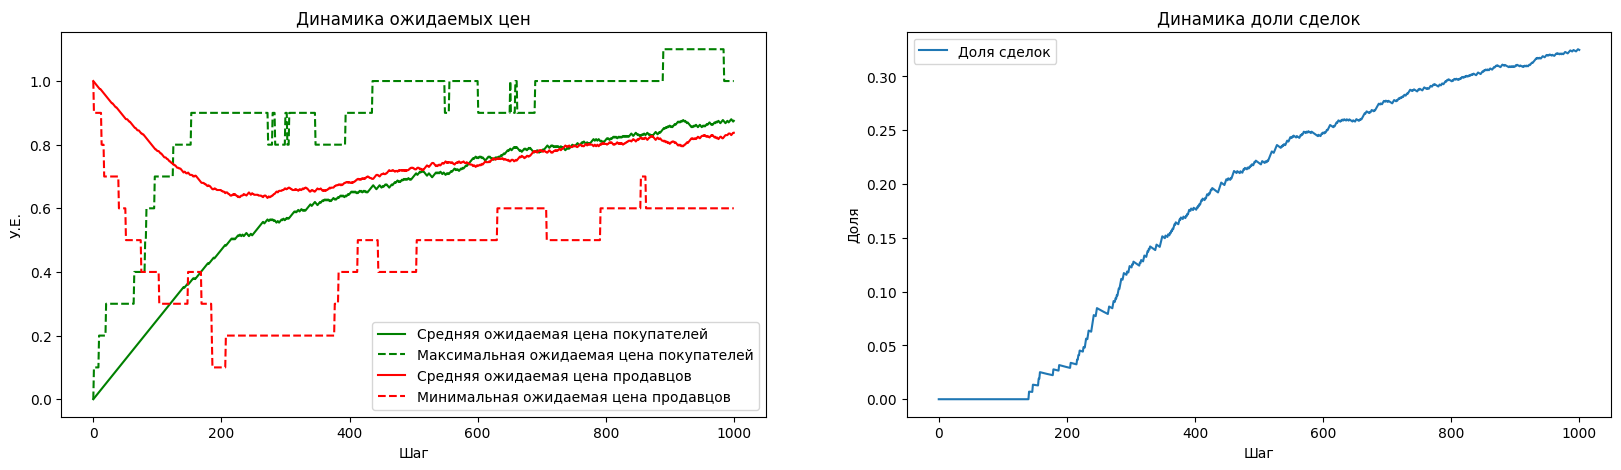

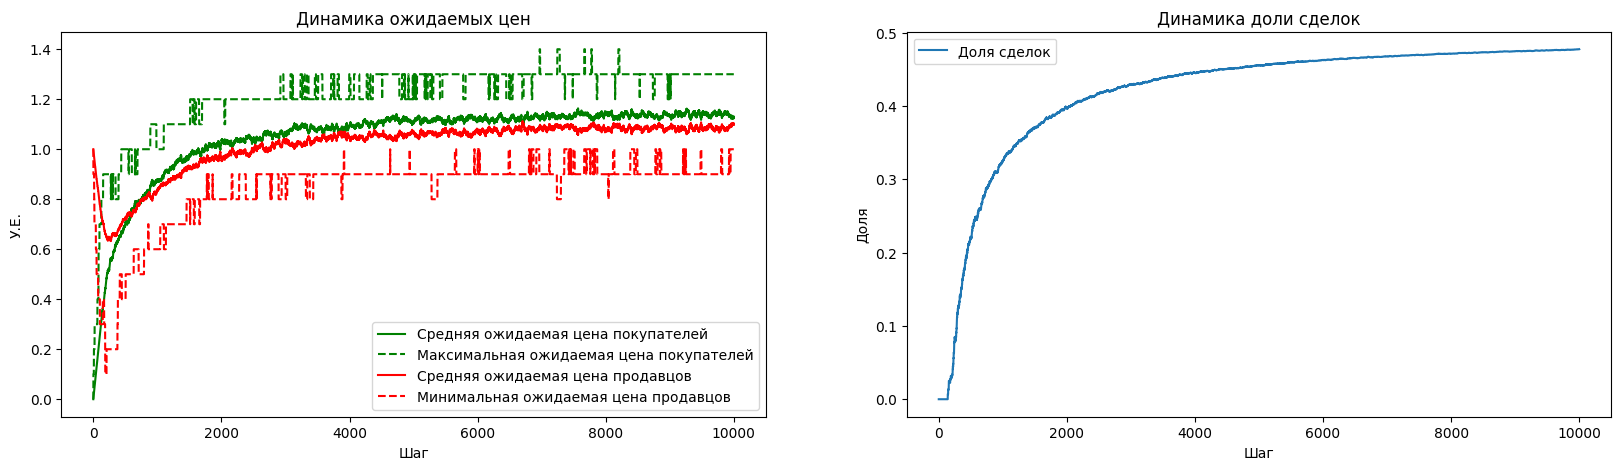

In [ ]:
model = Model(num_of_consumers=40,
              num_of_sellers=40,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(10000)
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 10000)

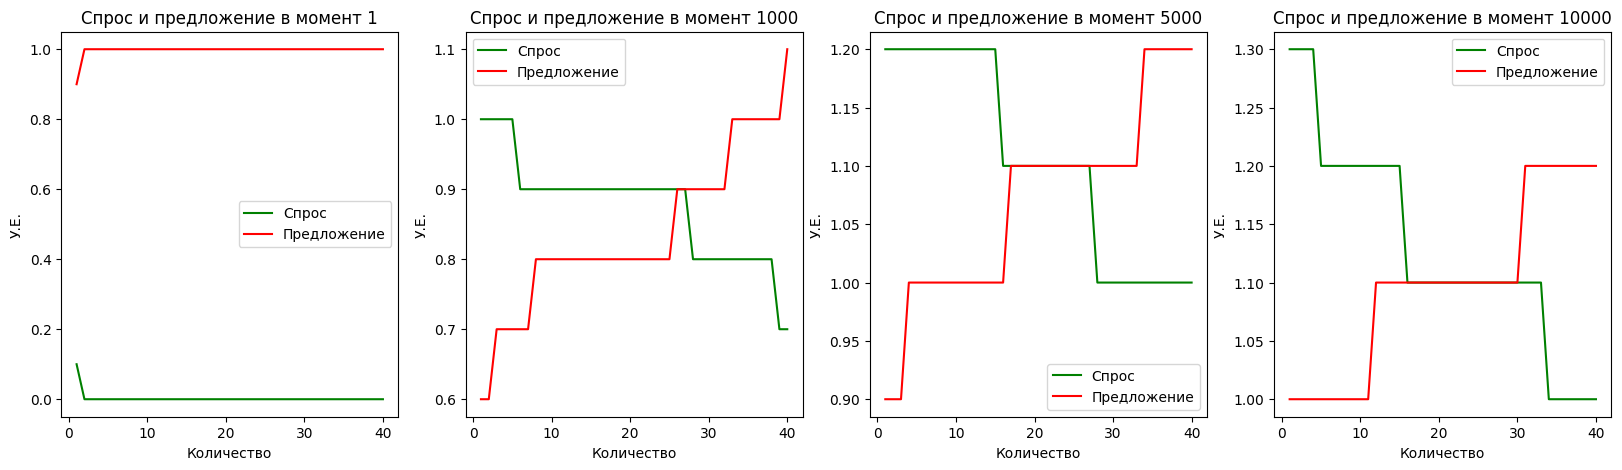

In [ ]:
# а теперь нарисуем графики спроса и предложения для модели с большим количеством продавцов и покупателей
model.plot_supply_and_demand([1, 1000, 5000, 10000])

100%|██████████| 1001/1001 [00:00<00:00, 95611.64it/s]


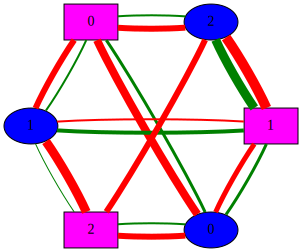

In [ ]:
# Вернемся к базовым параметрам и посмотрим, как меняются диаграммы с течением времени

model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)
model.plot_graph(0, 100)



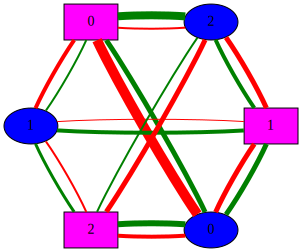

In [ ]:
model.plot_graph(200, 300)

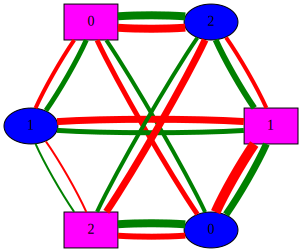

In [ ]:
model.plot_graph(600, 700)


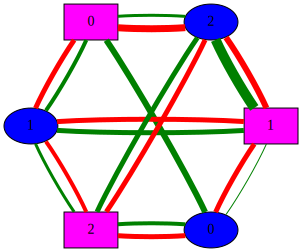

In [ ]:
model.plot_graph(900, 1000)


Видим, что с течением времени количество зеленых линий и их толщина увечичиваются, затем выходят на определенный постоянный уровень - это соответствует выходу доли сделок на уровень примерно 1/2.

Наконец, попробуем оценить влияние параметром consumer_min, consumer_max, seller_min, seller_max на работу модели. Очевидно, что если минимальная цена, за которую продавцы готовы отдать товар, больше, чем максимальная цена, которую готовы заплатить покупатели, сделки заключаться не будут:

100%|██████████| 1001/1001 [00:00<00:00, 173577.74it/s]


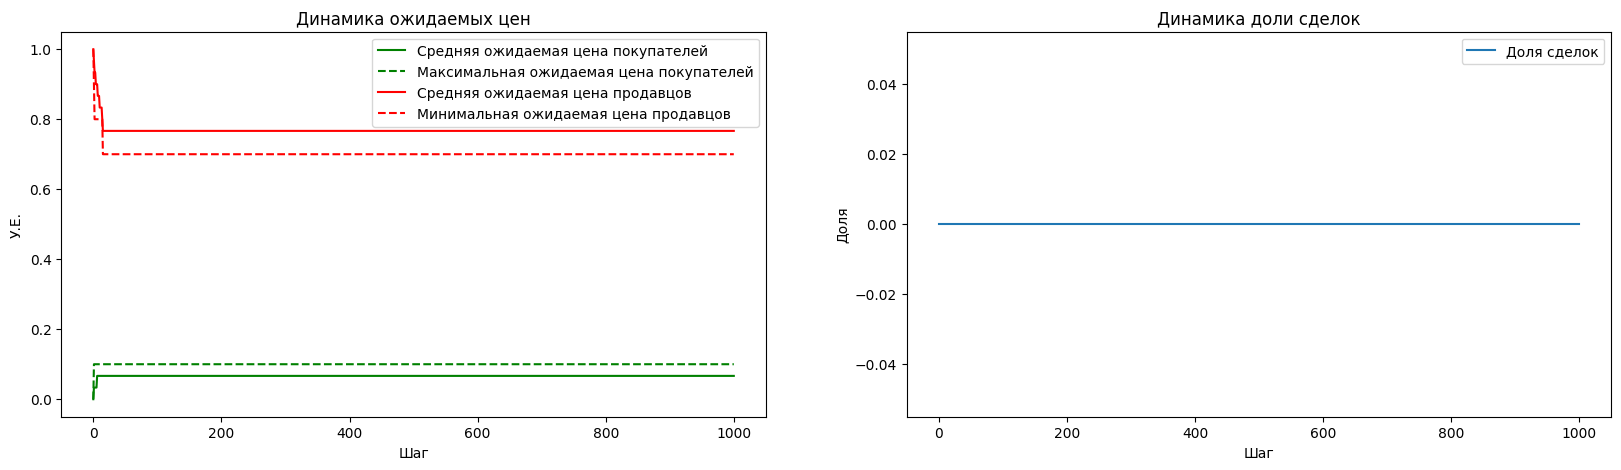

In [ ]:
model = Model(
  num_of_consumers=3,
  num_of_sellers=3,
  consumer_min=0,
  consumer_max=0.5,
  consumer_delta=0.1,
  seller_min=0.6,
  seller_max=1,
  seller_delta=0.1
)

model.run(1000)
model.plot_dynamics(0, 1000)

100%|██████████| 100001/100001 [00:01<00:00, 57238.99it/s]


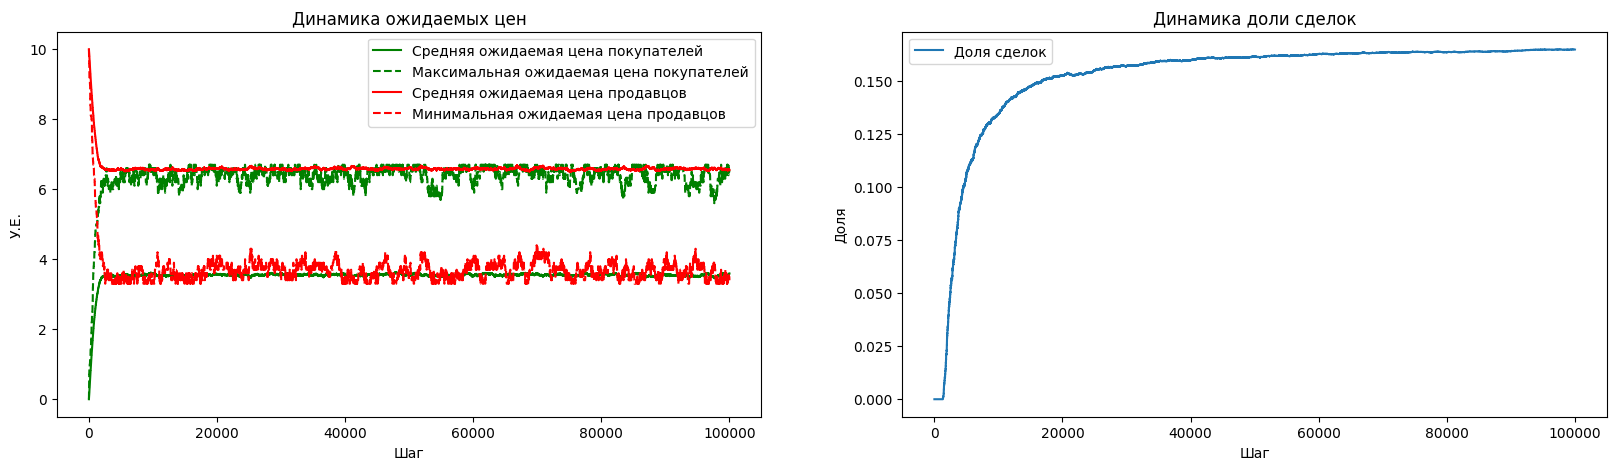

In [ ]:
model = Model(
  num_of_consumers=30,
  num_of_sellers=30,
  consumer_min=0,
  consumer_max=7,
  consumer_delta=0.1,
  seller_min=3,
  seller_max=10,
  seller_delta=0.1
)
model.run(100000)
model.plot_dynamics(0, 100000)

В примере выше, несмотря на то, что seller_min > consumer_max, ожидания покупателей и продавцов сильно отличаются, поэтому доля сделок сильно снижается и даже за 100 тысяч шагов модели доходит всего лишь до 0.15

Общий вывод:

1) чем меньше значение delta, тем меньше интервал, в который попадают ожидаемые цены, и тем больше время, за которое доля сделок выходит на постоянный уровень

2) доля сделок всегда стабилизируется на уровне, который зависит от параметров модели, в частности от цен (если не рассматривать вырожденные случаи, например когда максимальные цены покупателей меньше чем минимальные цены продавцов).

3) доля сделок в лучшем случае стремится к 1/2, а при определенных параметрах модели может быть еще меньше. Это связано с тем, как работает наша модель. Пока expect_price продавцов покупателей меньше, чем продавцов, сделки не совершаются, продавцы постепенно снижают цену, покупатели постепенно становятся готовы платить больше. Когда достигается равенство и совершается успешная сделка, продавец повышает цену, а покупатель понижает. Следовательно, следующая сделка между ними точно не будет успешной. А вот после нее (когда продавец снова снизит свою цену, а покупатель снова станет готов заплатить побольше), уже может быть заключена новая сделка. Таким образом, доля успешных договоров между продавцами и покупателями в этой модели не превышает 1/2.

3) чем больше на рынке агентов, тем сложнее им договариваться. С увеличением количество продавцов и/или потребителей нужно больше итераций модели, чтобы доля сделок стабилизировалась. Также, чем больше на рынке агентов, тем больше разброс минимальных/максимальных ожидаемых цен

4) с течением времени разброс ожидаемых цен покупателей и продавцов сокращается. Чем больше num_of_steps, тем скорее всего больше будет доля успешных сделок к концу работы модели

## Еще больше случайности - разные вероятности выбора продавцов и покупателей

Модификация:
1. Разные вероятности выбора разных продавцов и покупателей.

In [ ]:

# функция, генерирующая вероятности выбора продавцов
np.random.RandomState(6)
def Distribution(n:int) -> np.array:
  p = np.random.rand(n)
  return  1/sum(p) * p # делим каждый элемент случайного массива на его сумму, чтобы сумма всех элементов была равна 1.


# Перепишем метод run так, чтобы вероятности выбора разных продавцов и покупателей были разными.
class Model2(Model):
  def run(self, num_of_steps):
    consumer_distribution = Distribution(self.num_of_consumers)
    seller_distribution = Distribution(self.num_of_sellers)
    for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
      consumer_id = np.random.choice(list(range(self.num_of_consumers)), p=consumer_distribution)
      seller_id = np.random.choice(list(range(self.num_of_sellers)), p=seller_distribution)
      self.deal(consumer_id, seller_id)


model2 = Model2(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model2.run(1001)

100%|██████████| 1002/1002 [00:00<00:00, 14011.36it/s]


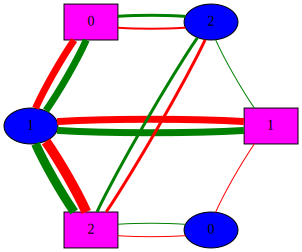

In [ ]:
model2.plot_graph(100, 200)


100%|██████████| 1002/1002 [00:00<00:00, 16551.96it/s]


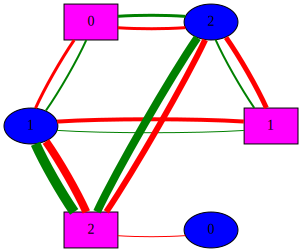

In [ ]:
model2_2 = Model2(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model2_2.run(1001)
model2_2.plot_graph(100, 200)


Получается, количество сделок между каждым продавцом и покупателем теперь зависит от фактора случайности. В примере выше большинство сделок совершается между покупателем 2 и продавцом 2, потому что они оказались самые "активные" (при других запусках результат может отличаться, потому что будет сгенерирована новое распределение вероятностей быть выбранным).

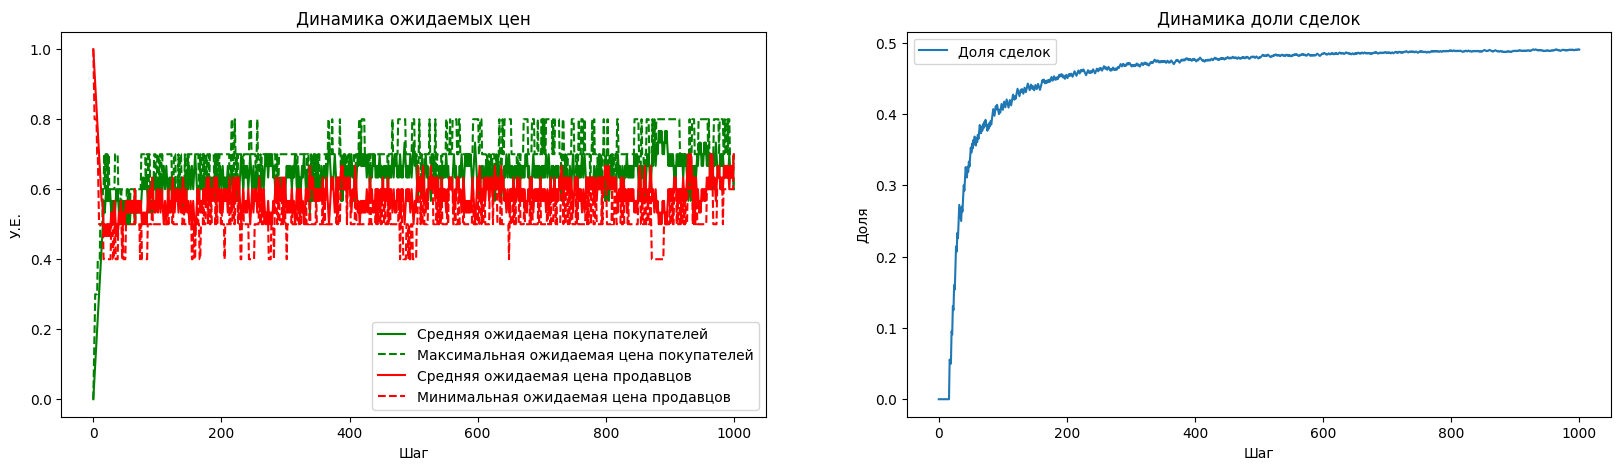

In [ ]:
model2.plot_dynamics(0, 1000)

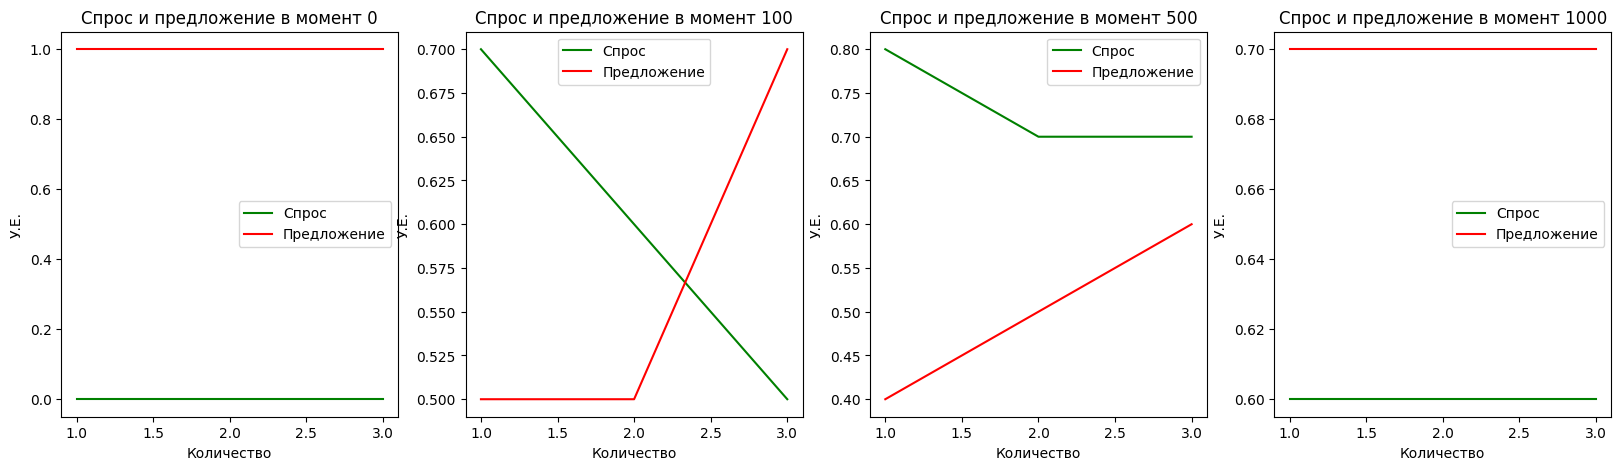

In [ ]:
model2.plot_supply_and_demand([0, 100, 500, 1000])



Видно, что из-за неравномерного распределения продавцов и покупателей им сложнее договариваться, из-за чего увеличиваются колебания ожидаемых цен и доли сделок.
По итогу количество сделок приближается к 1/2, а средняя ожидаемая цена как продавцов, так и потребителей - к единице, только для этого требуется больше времени, по сравнению со случаем, когда вероятности выбора каждого продавца и покупателя были одинаковыми.

Более того, из-за фактора случайности сложнее прогнозировать спрос в каждый конкретный момент времени.

Теперь запустим модель с другими параметрами, и посмотрим, как поменяются результаты по сравнению с базовой версией модели.

100%|██████████| 10001/10001 [00:00<00:00, 11198.33it/s]


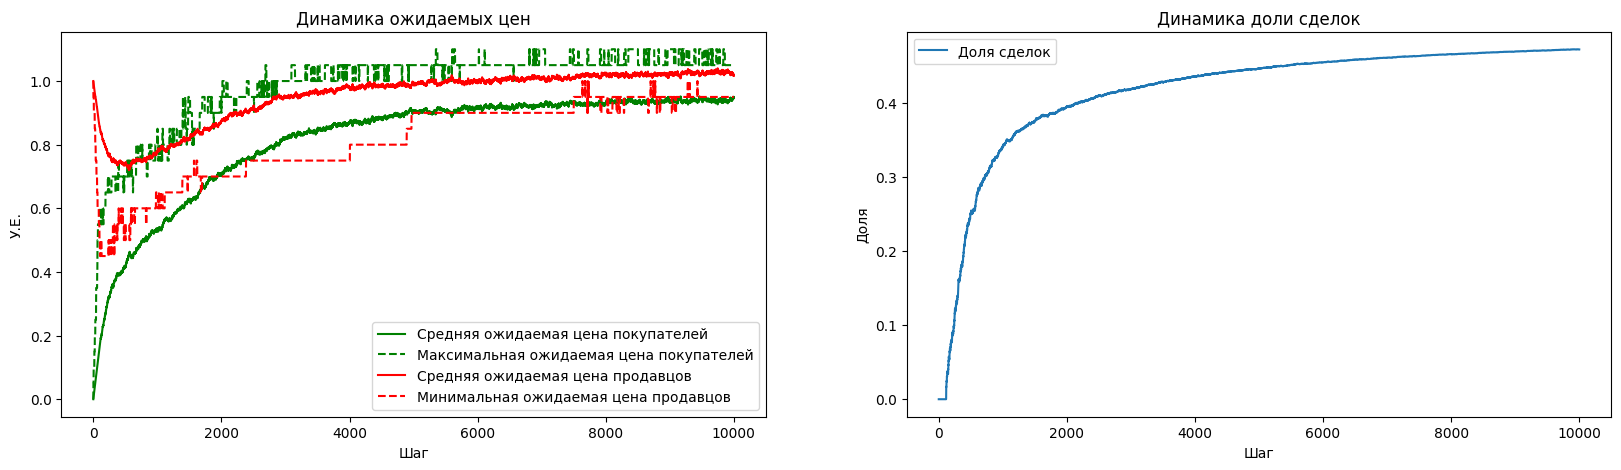

In [ ]:
model2_3 = Model2(num_of_consumers=30,
              num_of_sellers=30,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.05,
              seller_min=0,
              seller_max=1,
              seller_delta=0.05)
model2_3.run(10000)
model2_3.plot_dynamics(0, 10000)

При большом размере рынка (то есть большом количестве продавцов и покупателей) изменение модели приводит к тому, что доля сделок слишком медленно приближается к 1/2, и даже за 10 тысяч шагов модели достигает лишь где-то 0.45. То есть разное распределение веротяности быть выбранным между продавцами и покупателями несколько усложняет процесс переговоров

## Модификация 2 : время суток

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модификация:
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.


Описание изменений модели:

1) Изменение класса продавца: добавляется поле daily_plan - фиксированное количество товара, которое можно продать за 1 день. При совершении успешной сделки значение этого поля уменьшается на 1, если оно становится неположительным, сделки перестают совершаться и продавец уходит с рынка.
Метод Seller2.Reset(x) меняет значение атрибута daily_plan на число x. Используется в конце дня для всех продавцов этого рынка, чтобы "восполнить запасы" товара.

2) Изменение самой модели:
В классе появляется три новых поля - целое число max_connections, определяющая длину дня, список целых чисел daily_plans (на i-м месте стоит фиксированное количество товара, которое в день может продать i-й продавец) и булевая переменная show_remainder (если true, то модель будет показывать остатки продавцов в конце каждого дня).

Метод run(num_of_steps) теперь содержит два цикла - внешний по дням и внутренний по каждому дню, в день совершается max_connections шагов модели.

Метод deal теперь отдельно рассматривает случай, когда у продавцов закончились товары. В этом случае в deals_results записывается 0, однако ни продавцы, ни покупатели не изменяют ожидаемые цены (что логично, ведь сделка не состоялась не по причине разногласий о ценах).

Поле on_market хранит список нулей и единиц, где 0 на позиции i означает, что у i-го продавца закончился товар и он ушел с рынка до конца дня. В противном случае на позиции i стоит 1. При выборе продавца для заключения сделки распределние вероятностей задается с помощью Normalize(on_market) - нетрудно видеть, что таким образом будут равновероятно выбираться продавцы, у которых товар еще не закончился

### Реализация

In [ ]:
def Normalize(v:np.array):
  return 1/sum(v) * v

class Seller2(Seller):
  def __init__(self, daily_plan, seller_min, seller_max, seller_delta):
    super().__init__(seller_min, seller_max, seller_delta)
    self.daily_plan = daily_plan
  def Reset(self, daily_plan:int) -> None:
    self.daily_plan = daily_plan




class Model3(Model):

  def __init__(self, max_connections, daily_plans, num_of_consumers, num_of_sellers,
               consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, show_remainder):
    self.max_connections = max_connections
    self.daily_plans = daily_plans
    super().__init__(num_of_consumers, num_of_sellers,
               consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta)

    self.sellers = [Seller2(daily_plans[i], seller_min, seller_max, seller_delta) for i in range(num_of_sellers)]
    self.show_remainder = show_remainder
    # этот список будет хранить 1, если запасы продавца еще не закончились и он может участвовать с переговорах, и 0 иначе
    self.on_market = np.ones(num_of_sellers)

  # будет выводить на экран визуализацию остатков каждого продавца в конце каждого дня
  def ShowRemainder(self, day:int, ax:plt.Axes, add_labels=False) -> None:
    remainders = [s.daily_plan for s in self.sellers]
    ax.bar(list(str(i) for i in range(0, self.num_of_sellers)), remainders, color='maroon')
    ax.title.set_text(f'День {day}')
    if add_labels:
      ax.set_xlabel('Продавец')
      ax.set_ylabel('Излишки к концу дня')

  def run(self, num_of_steps):
      num_of_days = int(num_of_steps / self.max_connections)
      if self.show_remainder:
        fig, axs = plt.subplots(1, num_of_days + 1, figsize = (5 * (num_of_days + 1), 5))
      for day in trange(num_of_days + 1):
        for step in range(self.max_connections):
          consumer_id = random.randrange(0, self.num_of_consumers)
          # проверяем, остались ли продавцы на рынке; если нет, то фиксируем, что сделка не состоялась
          if sum(self.on_market) < 1:
            self.NoDeal(consumer_id)
            continue
          # выбираем продавцов: если у него не осталось товара, что вероятность быть выбранным 0, потому что значение on_market для него равно нулю
          # для остальным продавцов вероятность быть выбранным одинаковая
          seller_id = np.random.choice(list(range(0, self.num_of_sellers)), p=Normalize(self.on_market))
          self.deal(consumer_id, seller_id)

        if self.show_remainder:
          self.ShowRemainder(day, axs[day], add_labels=(True if day == 0 else 0))

        for i in range(len(self.sellers)):
          self.sellers[i].Reset(self.daily_plans[i])
        self.on_market = np.ones(self.num_of_sellers)

  def NoDeal(self, consumer_id:int):
    self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
    self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
    self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : None,
            'result' : 0,
            })

  def deal(self, consumer_id, seller_id):

    self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
    self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
    # если запасы товара исчерпались, то сделка не совершается, но ни продавец, ни покупатель не меняют свох ожидаемых цен,
    # потому что сделка не случилась по другой причине
    if self.sellers[seller_id].daily_plan <= 0:
      self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 0,
            })
      return


    if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 1
            })
        self.consumers[consumer_id].decrease_expect_price()
        self.sellers[seller_id].increase_expect_price()
        self.sellers[seller_id].daily_plan = self.sellers[seller_id].daily_plan - 1
        if self.sellers[seller_id].daily_plan <= 0:
          self.on_market[seller_id] = 0
    else:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 0,
            })
        self.sellers[seller_id].decrease_expect_price()
        self.consumers[consumer_id].increase_expect_price()

  def plot_dynamics(self, start, end):
    fig = plt.figure(figsize = (20,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    steps_range = list(range(start, end+1))
    ax1.title.set_text("Динамика ожидаемых цен")
    ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
    ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
    ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
    ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
    ax1.legend()
    ax1.set_xlabel("Шаг")
    ax1.set_ylabel("У.Е.")
    deals_sum = [0]
    for i in range(start, end+1):
        deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
    deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
    ax2.title.set_text("Динамика доли сделок")
    ax2.plot(steps_range, deals_fraction, label="Доля сделок")
    ax2.legend()
    ax2.set_xlabel("Шаг. Розовая вертикальная линия означает новый день")
    ax2.set_ylabel("Доля")
    for i in range(start, end, self.max_connections):
      ax1.axvline(x=i, ls='--', color='pink', alpha=0.5)
      ax2.axvline(x=i, ls='--', color='pink', alpha=0.5)




### Демонстрация работы модели

100%|██████████| 6/6 [00:00<00:00, 47.65it/s]


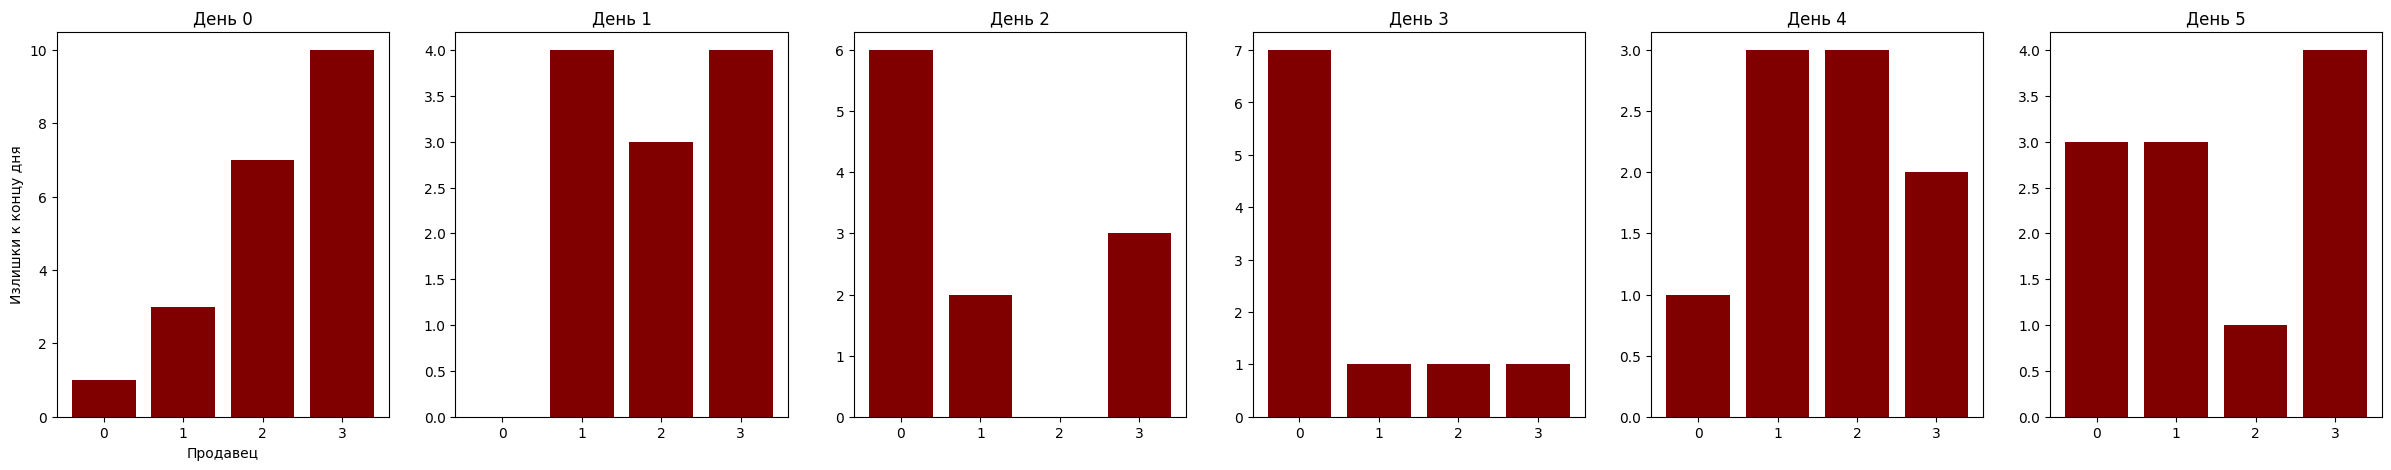

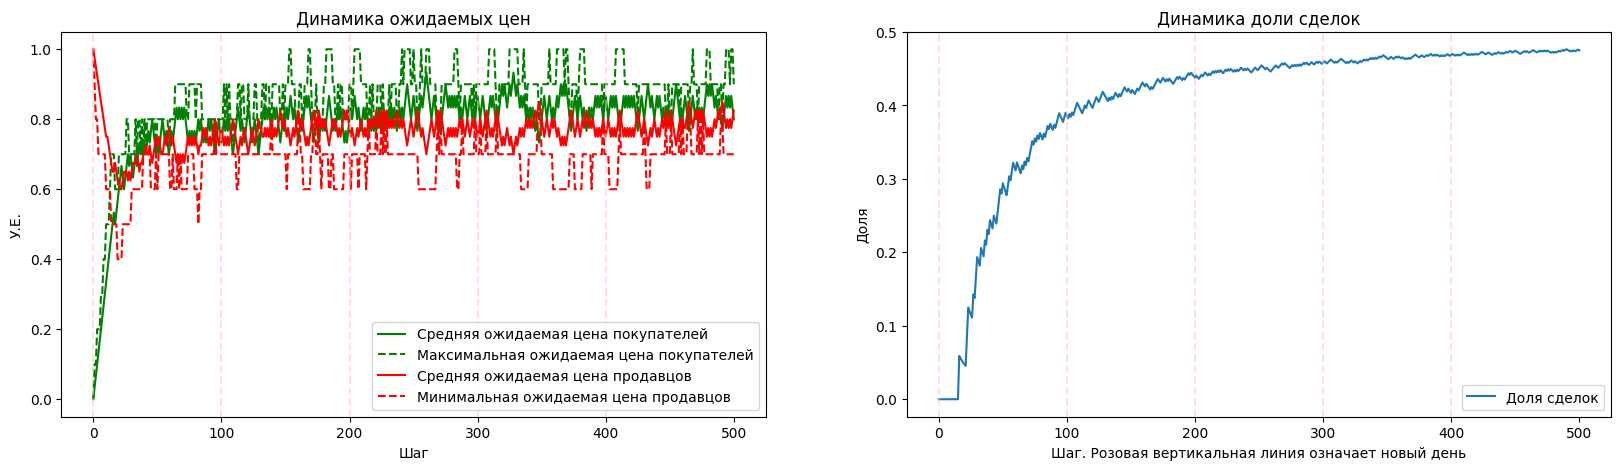

In [ ]:
m3_0 = Model3(
  max_connections=100,
  daily_plans=[15, 15, 15, 15],
  num_of_consumers=3,
  num_of_sellers=4,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  show_remainder=True
)
m3_0.run(500)
m3_0.plot_dynamics(0, 500)

При таких параметрах (заметим, что в данном случае запасы большинства продавцов не заканчивались к концу дня) не наблюдается сильных отличий от базовой модели. Однако все равно можно заметить более резкие изменения доли сделок за счет того, что у некоторых продацов все же заканчивался товар.

Далее  запустим модель с другими параметрами.

### Пример 1: запасы товара заканчиваются к концу дня

100%|██████████| 5/5 [00:00<00:00, 78.14it/s]


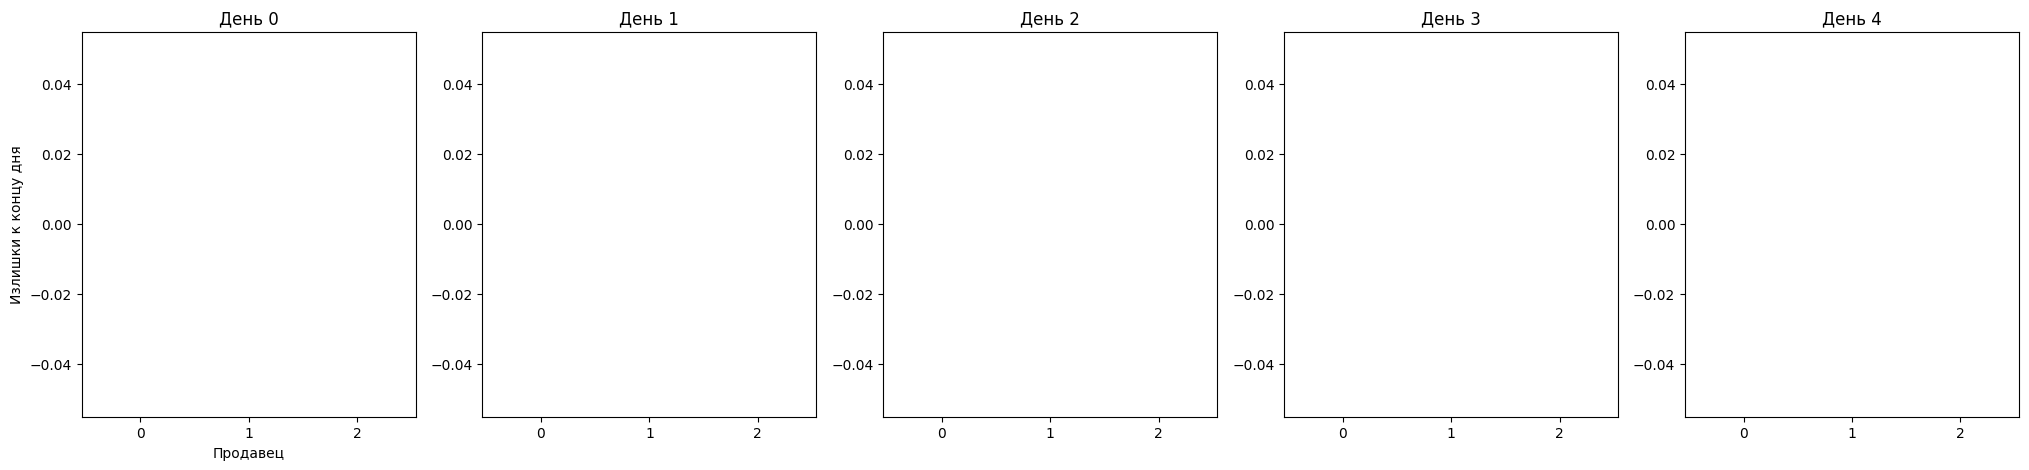

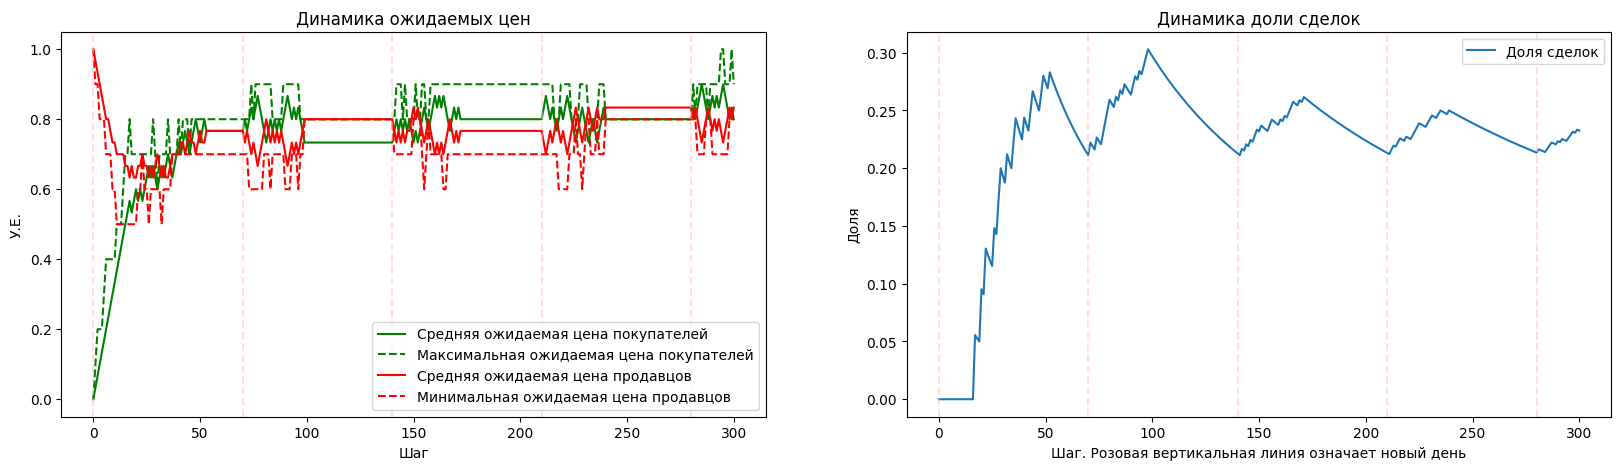

In [ ]:
m3 = Model3(
  max_connections=70,
  daily_plans=[5, 5, 5],
  num_of_consumers=3,
  num_of_sellers=3,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  show_remainder=True
)


m3.run(300)
m3.plot_dynamics(0, 300)

Проинтерпретируем полученные результаты:

Теперь доля сделок зависит от времени суток - в конце дня количество сделок уменьшается, потому что запасы продавцов заканчиваются. Утром, напротив, количество сделок резко увеличивается, потому что запасы восполняются. В итоге график доли сделок (в частности при этих параметрах) принимает зигзагообразный вид, и изломы графика примерно совпадают со сменой дней.

Согласно графикам остатков товара по дням, ни в один день продавцов не осталось никаких излишков, то есть запасы полностью заканчивались. Это объясняет уменьшение доли сделок к вечеру каждого дня.

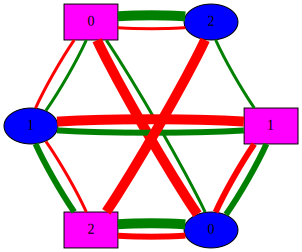

In [ ]:
m3.plot_graph(100, 200)

Весьма любопытно выглядит граф этого примера. Продавцы без товара уходят с рынка, поэтому сделки, не заключенные по причине отсутствия продавцов, никак не учитываются при построении графа. По этой причине мы получаем относительно большую долю состоявшихся сделок - много зеленых линий

### Пример 2: большой дневной запас товара

100%|██████████| 6/6 [00:00<00:00, 80.11it/s]


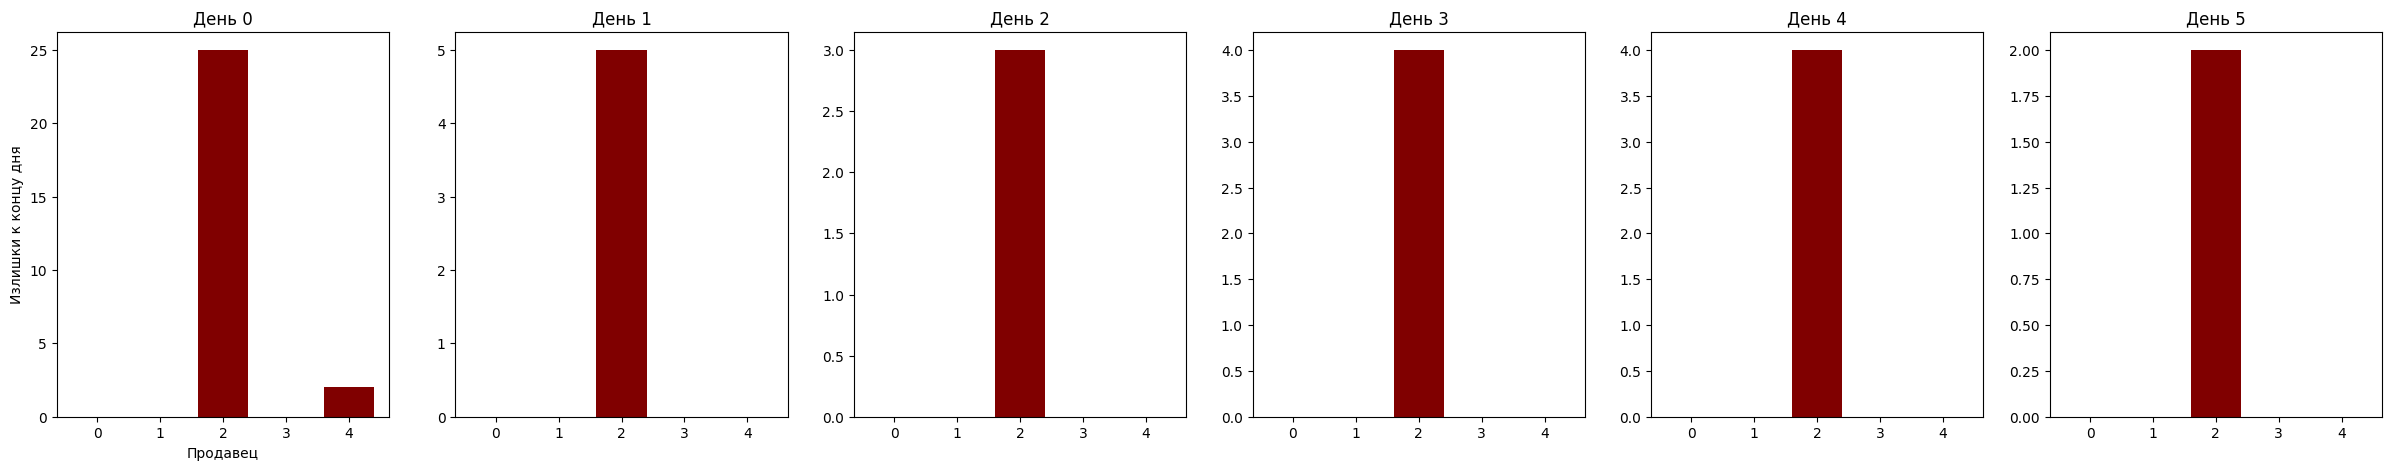

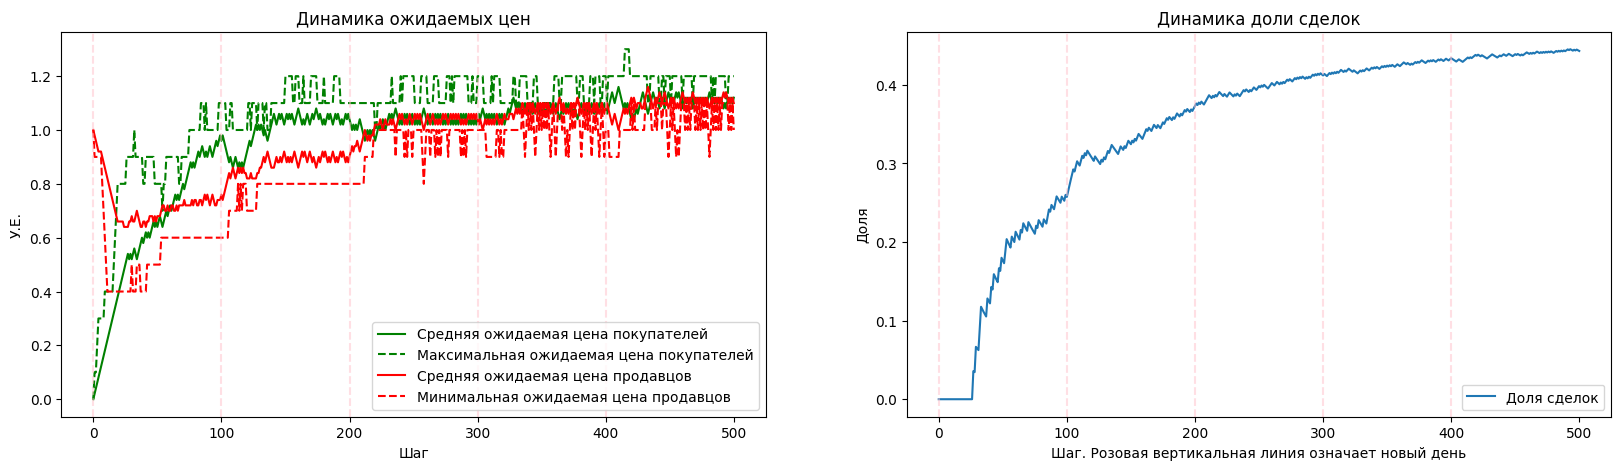

In [ ]:
# запустим модель с другими параметрами
m3_2 = m3 = Model3(
  max_connections=100,
  daily_plans=[2, 2, 40, 4, 5],
  num_of_consumers=5,
  num_of_sellers=5,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  show_remainder=True
)
m3_2.run(500)
m3_2.plot_dynamics(0, 500)


В примере выше практически исчез "вечерний" эффект, который наблюдался раньше. У продавца номер 2 достаточно запасов, чтобы торговать весь день, поэтому доля сделок не падает к концу дня.


Фактически "вечером" купить товар можно только у продавца с индексом 2, попытки заключить сделки с другими агентами обречены. Это подтверждается и графом этой модели (для наглядности возьмем "вторую половину дня" во второй день работы модели, то есть шаги с 150 по 200):

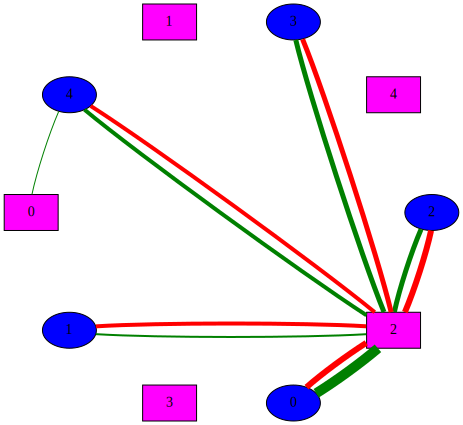

In [ ]:

m3_2.plot_graph(150, 200)

Действительно, предположение подтверждается: больше всего успешных сделок совершается с продавцом номер 2. Этот результат очень закономерный и очевидный: после того, как продавцы 0,1,3,4 продают весь свой товар и уходят с рынка, все покупатели приходят в продавцу 2. Поэтому мы видим очень много как удачных, так и неудачных попыток завершить сделку с ним


## Модицикация 3 : учет географического фактора. Определение координат агентов по адресу + интерактивная карта


Финальное измененение

Изменение модели будет учитывать географическое положение продавцов и покупателей. Дополнительными параметрами в нее передается:

1) Список местоположений покупателей (для каждого покупателя - строка с его адресом).

2) Аналогичный список для продавцов

3) logistics_cost - средняя цена перевозки товара на сто километров. При попытке совершить сделку к цене будет добавляться $\frac{dist}{100} \times logistics\ cost$

При моделировании заключения сделок происходит следующая процедура: случайно выбирается покупатель, затем для него происходит подсчет расстояний до каждого продавца исходя из их местоположений, затем выбирается продавец с вероятностью $\alpha \frac{1}{dist}$, где $\alpha$ - коэффициент, нужный чтобы сумма вероятностей выбора всех продавцов равнялась 1. Иными словами, вероятность быть выбранным обратно пропорциональная расстоянию до покупателя.

Небольшой технический момент: некоторые библиотечные функции могут не работать локально, поэтому чтобы перезапустить код может понадобиться google colab. В vscode, чтобы карты правильно отображались, может понадобиться изменить настройки (trust this window при открытии файла).

### Реализация

In [ ]:
# geopy и geopandas для определения координат покупателей и производителей
!pip install geopandas
!pip install geopy
# folium и mapclassify для красивой интерактивной карты
!pip install folium
!pip install mapclassify

import pandas as pd
import geopandas as gpd
# чтобы считать расстояние между двумя точками земного шара
from geopy.distance import distance as dist


In [ ]:
class Model4(Model):
  def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta,
               consumer_locations, seller_locations, logistics_cost):
    super().__init__(num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta)
    # определяем геолокацию участников рынка
    self.consumer_locations = gpd.tools.geocode(consumer_locations)
    self.seller_locations = gpd.tools.geocode(seller_locations)
    self.logistics_cost = logistics_cost

  # считает расстояние между конкретным покупателем и производителем
  def Distance(self, consumer_id:int, seller_id:int):
    p1 = self.consumer_locations.iloc[consumer_id]['geometry']
    p2 = self.seller_locations.iloc[seller_id]['geometry']
    point1 = (p1.y, p1.x)
    point2 = (p2.y, p2.x)
    return dist(point1, point2).km

  def TransportationCost(self, d:int):
    return (d / 100) * self.logistics_cost

  def deal(self, consumer_id, seller_id):
    self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
    self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
    # если цена + затраты на логистику не превосходят ожидаемую цену потребителя, сделка совершается
    if (self.sellers[seller_id].expect_price + self.TransportationCost(self.Distance(consumer_id, seller_id))) <= self.consumers[consumer_id].expect_price:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 1
            })
        self.consumers[consumer_id].decrease_expect_price()
        self.sellers[seller_id].increase_expect_price()
    else:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 0
            })
        self.sellers[seller_id].decrease_expect_price()
        self.consumers[consumer_id].increase_expect_price()


  def Distribution(self, consumer_id:int) -> list:
    lst = []
    for i in range(0, self.num_of_sellers):
      lst.append(self.Distance(consumer_id, i))
    ans = np.array(
        [1/x if x < 1 else 1 for x in lst]
    )
    return 1/sum(ans) * ans

  def run(self, num_of_steps:int) -> None:
    for _ in trange(num_of_steps+1):
      consumer_id = random.randrange(0, self.num_of_consumers)
      seller_id = np.random.choice(list(range(0, self.num_of_sellers)), p=self.Distribution(consumer_id))
      self.deal(consumer_id, seller_id)
  def Map(self, scale='100%') -> None:
    c = self.consumer_locations
    c = c.assign(consumer_id=pd.Series(list(range(self.num_of_consumers))))
    m = c.explore(
          color='turquoise',
          cmap='plasma',
          width=scale,
          height=scale,
          style_kwds={
          'weight': 10
          },
          legend_kwds={
            'colorbar':False,
          }

    )
    s = self.seller_locations
    s = s.assign(seller_id=pd.Series(list(range(self.num_of_sellers))))
    m = s.explore(m=m,
          color='maroon',
          width=scale,
          height=scale,
          style_kwds={
          'weight': 10
          },
          legend_kwds={
            'colorbar':False,
          }
    )
    return m

  def plot_graph(self, start, end):
        g_deals = {}
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
        for i in range(start, end+1):
            if self.deals_results[i]['result'] == 0 and self.deals_results[i]['seller_id'] != None:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            elif self.deals_results[i]['seller_id'] != None:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1
        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])
        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            c = f"C {consumer_id}" + '\n' + self.consumer_locations.iloc[consumer_id]['address']
            graph.node(c, label=str(consumer_id), style='filled', fillcolor='blue')
        for seller_id in range(self.num_of_sellers):
            s = f"S {seller_id}" + '\n' + self.seller_locations.iloc[seller_id]['address']
            graph.node(s, label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
          consumer_id = edge[0]
          c = f"C {consumer_id}" + '\n' + self.consumer_locations.iloc[consumer_id]['address']
          seller_id = edge[1]
          s = f"S {seller_id}" + '\n' + self.seller_locations.iloc[seller_id]['address']
          graph.edge(c, s, penwidth = get_penwidth(value['negative_count']), color="red")
          graph.edge(c, s, penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph







### Демонстрация работы модели: районы Москвы

100%|██████████| 1001/1001 [00:04<00:00, 207.58it/s]


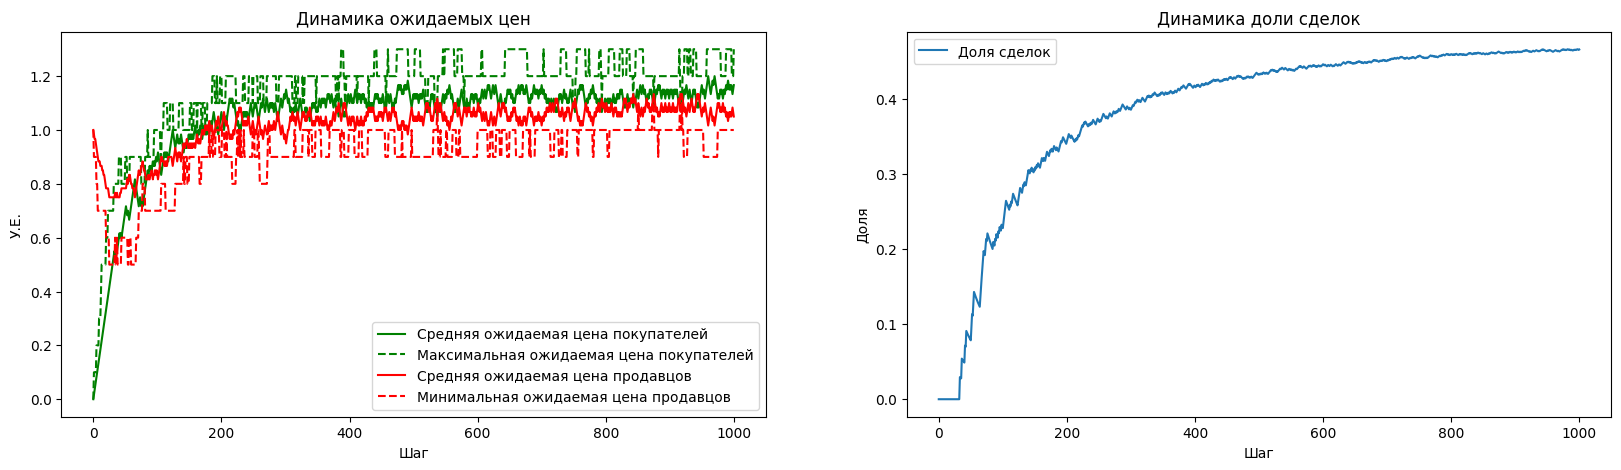

In [ ]:
# продемонтрируем техническую часть модели на примере родного города

m4 = Model4(
  num_of_consumers=6,
  num_of_sellers=6,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
consumer_locations = [
      'Покровский бульвар, Москва',
      'Таллинская улица, Москва',
      'Бирюлево, Москва',
      'Измайлово, Москва',
      'Текстильщики, Москва',
      'Лианозово, Москва'

  ],
  seller_locations = [
      'Шаболовка, Москва',
      'Улица Космонавта Волкова, Москва',
      'Мясницкая улица, Москва',
      'Старое Крюково, Зеленоград, Москва',
      'Очаково-Матвеевское, Москва',
      'Ростокино, Москва'
  ],
  logistics_cost=0.1
)

m4.run(1000)
m4.plot_dynamics(0, 1000)

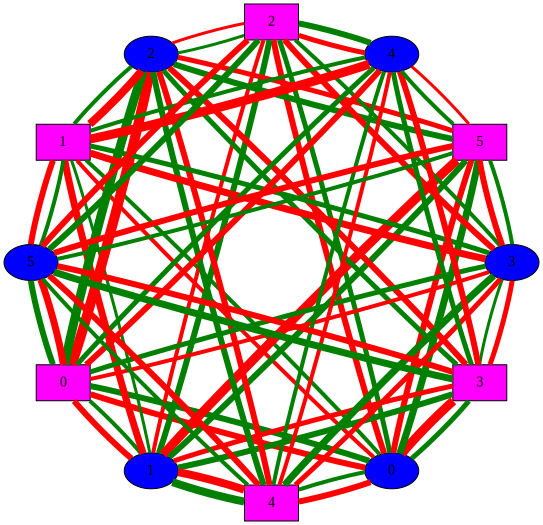

In [ ]:
# если навести курсор на вершину графа, можно увидеть адрес покупателя или производителя
m4.plot_graph(0, 1000)

In [ ]:
# интерактивная карта: если навести курсор на точку, можно увидеть seller_id или consumer_id, а также адрес
m = m4.Map()
m

### Пример 2: мировая экономика

In [ ]:
# Теперь распределим продавцов и покупателей по всему миру
m4_2 = m4 = Model4(
  num_of_consumers=7,
  num_of_sellers=7,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  consumer_locations = [
      'Moscow, Russia',
      'Boston, MA, US',
      'London, Great Britain',
      'Kyoto, Japan',
      'Addis Ababa, Ethiopia',
      'Sydney, Australia',
      'Rio de Janeiro, Brazil'
  ],
  seller_locations = [
      'Madrid, Spain',
      'Montreal, Canada',
      'Daegu, South Korea',
      'Santiago de Chile, Chile',
      'Mexico city, Mexico',
      'Shanghai, China',
      'Helsinki, Finland'
  ],
  logistics_cost=0.01
)
m4_2.Map('100%')

100%|██████████| 1144/1144 [00:05<00:00, 192.39it/s]


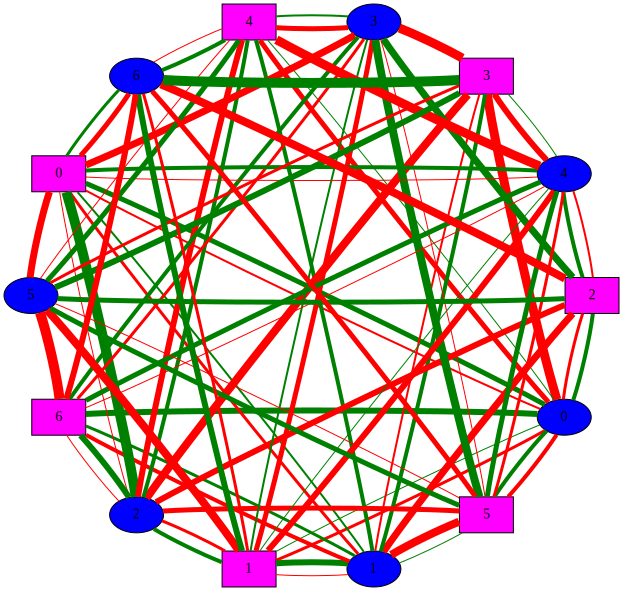

In [ ]:
m4_2.run(1143)
m4_2.plot_graph(0, 1143)

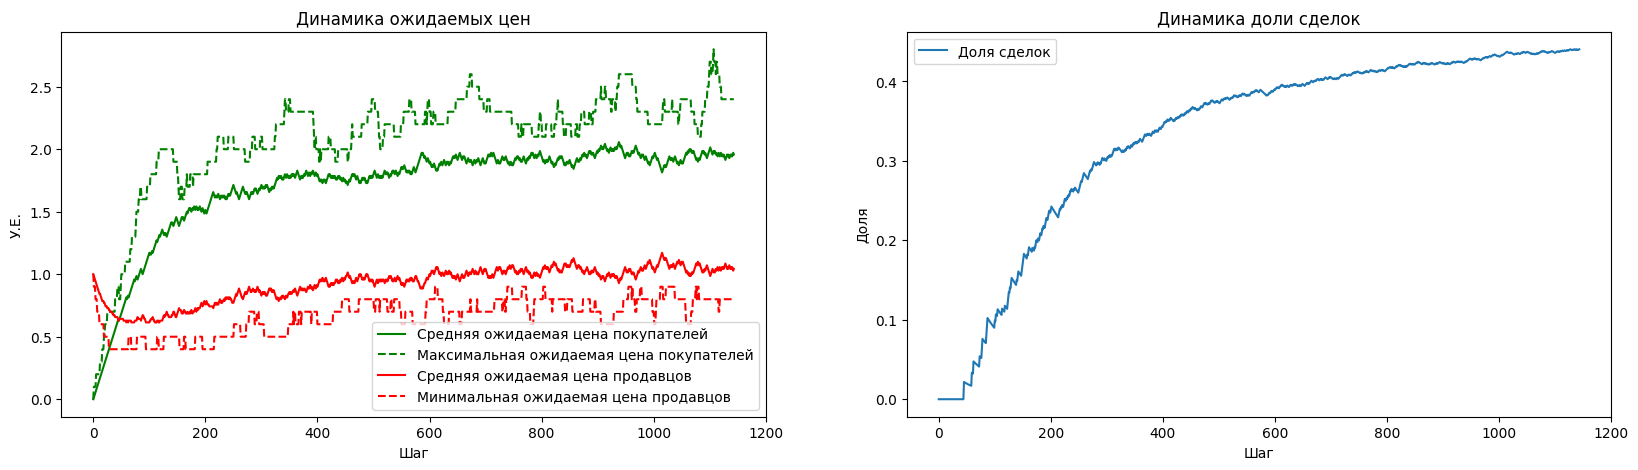

In [ ]:
m4_2.plot_dynamics(0, 1143)

In [ ]:
print(m4.Distance(1, 1))
m4.Distance(consumer_id=1, seller_id=3)

402.69097283059637


8393.911350111757

На графе видно, что у некоторых продавцов и покупателей больше взаимодействия друг с другом, а у некоторых наоборот меньше. Например, на графе есть устойчивая зеленая связь между первым покупателем и первым продавцом - они находятся совсем близко, между Бостоном и Монреалем всего 402 километра, что в масштабах мира достаточно близко. А попыток заключить сделку между покупателем 1 из Бостона и продавцом из Сантьяго очень мало, потому что расстояние между этими городами почти 8400 километров.

Теперь проинтерпретируем полученные выводы.

При заключении сделок модель стала учитывать географический фактор. В этом смысле она стала более похожа на реальную экономику, где существуют как глобальные, так и региональные рынки, и взаимодействие между агентами из одного региона в среднем более интенсивное, чем между агентами из разных.

Доля успешных сделок между удаленными друг от друга покупателями и производителями очень маленькая по нескольким причинам. Во-первых, при моделировании заложена маленькая вероятность попытки заключить сделку. Во-вторых, цена такой сделки будет выше за счет затрат на логистику. В-третьих, потребители, взаимодействуя с географически близкими продавцами, будут понижать понижать свой expect_price, поэтому товар от географически удаленных продавцов будет менее конкурентоспособен

### Пример 3 + выводы: влияние расходов на логистику

Предположим, что мы рассматриваем рынок какого-то товара, перевозка которого обходится очень дорого. Посмотрим, как изменится результат моделирования при повышении logistics_cost

In [ ]:

m4_3 = Model4(
  num_of_consumers=5,
  num_of_sellers=5,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  consumer_locations = [
      'Находка, Приморский край, Россия',
      'Тольятти, Самарская область, Россия',
      'Ульяновск, Ульяновская область, Россия',
      'Кисловодск, Ставропольский край, Россия',
      'Махачкала, Дагестан, Россия'
  ],
  seller_locations = [
      'Владивосток, Приморский край, Россия',
      'Самара, Самарская область, Россия',
      'Чебоксары, республика Чувашия, Россия',
      'Астрахань, Астраханская область, Россия',
      'Грозный, Чеченская республика, Россия'
  ],
  logistics_cost=0.7
)

m = m4_3.Map()
m

100%|██████████| 1001/1001 [00:03<00:00, 271.51it/s]


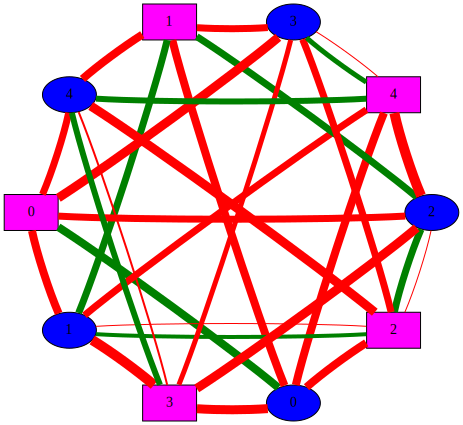

In [ ]:
m4_3.run(1000)
m4_3.plot_graph(0, 1000)


На этом графе четко видно, что сформировались региональные рынки. Из-за высокой стоимости транспортировки стало невыгодно заключать договор, если контрагент находится слишком далеко.

В итоге рынок разделился на 3 группы - первая находится на Северном Кавзказе (потребители и продавцы с индексами 3 и 4), вторая в Поволжье (потребители и продавцы с индексами 1 и 2), третья в Приморском крае (потребитель с индексом 0 и продавец с индексом 0). При этом продавцы и покупатели из разных  вообще не заключают успешных сделок из-за высокой стоимости перевозки.

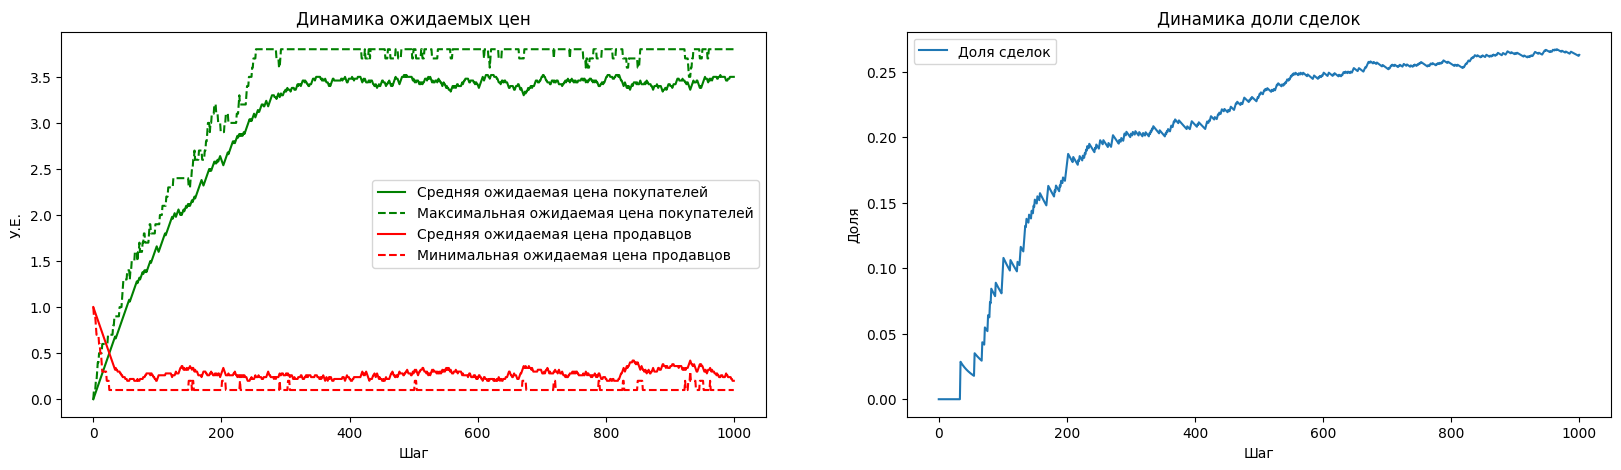

In [ ]:
m4_3.plot_dynamics(0, 1000)

100%|██████████| 1001/1001 [00:03<00:00, 281.17it/s]


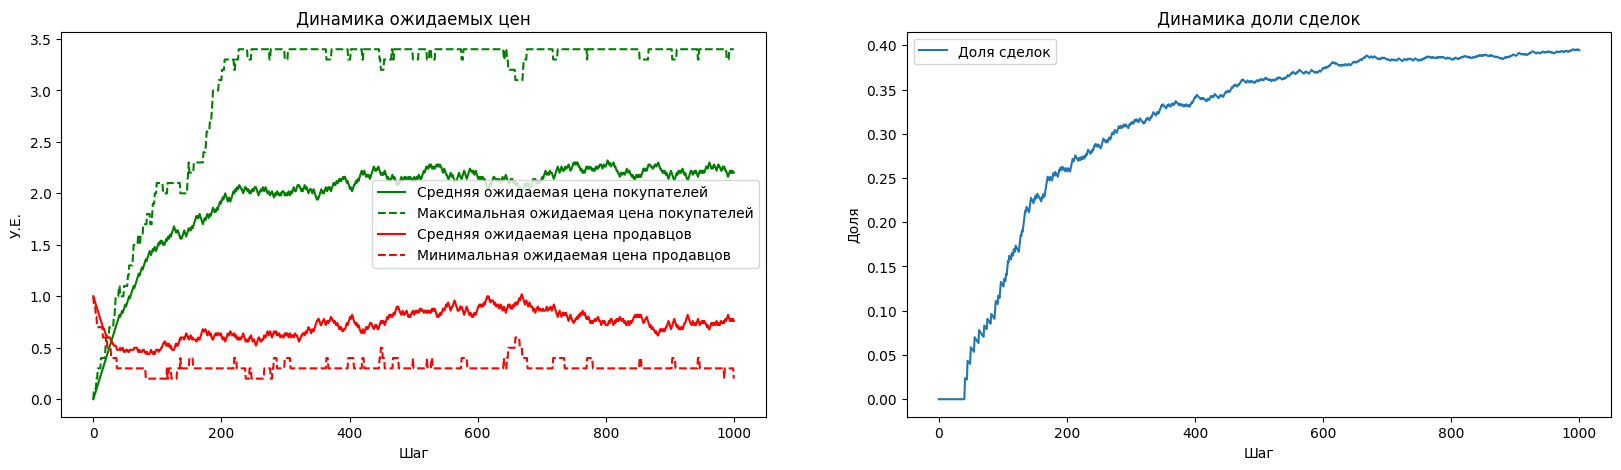

In [ ]:
m4_4 = Model4(
  num_of_consumers=5,
  num_of_sellers=5,
  consumer_min=3,
  consumer_max=4,
  consumer_delta=0.1,
  seller_min=0,
  seller_max=1,
  seller_delta=0.1,
  consumer_locations = [
      'Находка, Приморский край, Россия',
      'Тольятти, Самарская область, Россия',
      'Ульяновск, Ульяновская область, Россия',
      'Кисловодск, Ставропольский край, Россия',
      'Махачкала, Дагестан, Россия'
  ],
  seller_locations = [
      'Владивосток, Приморский край, Россия',
      'Самара, Самарская область, Россия',
      'Чебоксары, республика Чувашия, Россия',
      'Астрахань, Астраханская область, Россия',
      'Грозный, Чеченская республика, Россия'
  ],
  logistics_cost=0.1
)
m4_4.run(1000)
m4_4.plot_dynamics(0, 1000)

Вместе с тем, получается, что слишком большие затраты на логистику понижают долю успешных сделок. Если с logistics_cost=0.1 доля успешных сделок почти 0.4, то с logistics_cost=0.7 она не доходит даже до 0.3.

Эта модель подтверждает, что странам необходимо вкладываться в развитие транспортной инфраструктуры. Если сеть автомобильных, железных дорог, а также речных, морских и авиаперевозок не развита, то расходы на перевоз товаров из одного региона в другой будут очень высокими, и экономика будет менее эффективна.

Данный теоретический вывод подтверждается наблюдаемой реальностью: например, тем фактом, что в большинстве развитых стран хорошо налажены транспортные коммуникации, а в большинстве развивающихся - наоборот, развитие инфраструктуры осталяет желать лучшего. Конечно, это не единственная и не главная причина низкого уровня экономического развития, но она тоже оказывает свое влияние.